<a href="https://colab.research.google.com/github/harshyadav1508/DeepLearningModel_POC/blob/main/LSTM_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [4]:
class LSTMModel(nn.Module):

  def __init__(self, input_size, hidden_size, num_layers, output_size):
    super(LSTMModel, self).__init__()
    self.lstm=nn.LSTM(input_size,hidden_size, num_layers, batch_first=True)
    self.fc=nn.Linear(hidden_size,output_size)

  def forward(self,x):
    h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
    c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
    out, _ = self.lstm(x, (h0, c0))
    out = self.fc(out[:, -1, :])
    return out

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 164568946.56it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 67673571.97it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43984147.37it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 14432218.76it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [6]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True )
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [7]:
model = LSTMModel(input_size=28, hidden_size=64, num_layers=1, output_size=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Epoch 1, Batch 0: Loss = 2.2931
Epoch 1, Batch 100: Loss = 1.3175
Epoch 1, Batch 200: Loss = 0.5138
Epoch 1, Batch 300: Loss = 0.4655
Epoch 1, Batch 400: Loss = 0.2791
Epoch 1, Batch 500: Loss = 0.2719
Epoch 1, Batch 600: Loss = 0.3200
Epoch 1, Batch 700: Loss = 0.1517
Epoch 1, Batch 800: Loss = 0.1938
Epoch 1, Batch 900: Loss = 0.2793
Epoch 2, Batch 0: Loss = 0.1155
Epoch 2, Batch 100: Loss = 0.2643
Epoch 2, Batch 200: Loss = 0.1880
Epoch 2, Batch 300: Loss = 0.0689
Epoch 2, Batch 400: Loss = 0.1652
Epoch 2, Batch 500: Loss = 0.0584
Epoch 2, Batch 600: Loss = 0.2172
Epoch 2, Batch 700: Loss = 0.1946
Epoch 2, Batch 800: Loss = 0.1574
Epoch 2, Batch 900: Loss = 0.2515


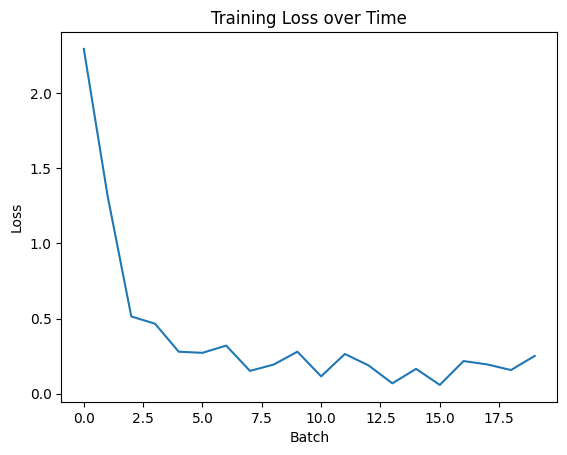

In [8]:
#Train the model and plot the loss over time
losses = []
for epoch in range(2):
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data.view(-1, 28, 28))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Epoch {}, Batch {}: Loss = {:.4f}'.format(epoch+1, batch_idx, loss.item()))
            losses.append(loss.item())

plt.plot(losses)
plt.title('Training Loss over Time')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.show()

In [10]:
# Test the model
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data.view(-1, 28, 28))
        
        test_loss += criterion(output, target).item() * data.size(0)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
test_loss /= len(test_loader.dataset)
accuracy = 100. * correct / len(test_loader.dataset)
print('Test set: Average loss = {:.4f}, Accuracy = {}/{} ({:.2f}%)'.format(test_loss, correct, len(test_loader.dataset), accuracy))

Test set: Average loss = 0.1050, Accuracy = 9708/10000 (97.08%)


In [16]:
print(len(test_loader.dataset))
print(len(train_loader.dataset))

 
print(len(test_loader.dataset[0][0]))

10000
60000
1


In [20]:
test_loader.dataset[0][0].shape


torch.Size([1, 28, 28])